<a href="https://colab.research.google.com/github/220660121086/UAS_220660121086_Agung-Ferbian/blob/main/UAS_Agung_Febrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving anime-dataset-2023.csv to anime-dataset-2023.csv


In [ ]:
df = pd.read_csv('anime-dataset-2023.csv')
print(df.head())

   anime_id                             Name             English name  \
0         1                     Cowboy Bebop             Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                         Other name Score  \
0                         カウボーイビバップ  8.75   
1                    カウボーイビバップ 天国の扉  8.38   
2                             トライガン  8.22   
3  Witch Hunter ROBIN (ウイッチハンターロビン)  7.25   
4                            冒険王ビィト  6.94   

                                 Genres  \
0         Action, Award Winning, Sci-Fi   
1                        Action, Sci-Fi   
2             Action, Adventure, Sci-Fi   
3  Action, Drama, Mystery, Supernatural   
4      Adventure, Fantasy, Supernatural   

                               

In [ ]:
df_clustering = df[['Episodes', 'Score', 'Genres']].copy()

In [ ]:
df_clustering['Episodes'] = df_clustering['Episodes'].replace('UNKNOWN', pd.NA)
df_clustering = df_clustering.dropna(subset=['Episodes', 'Score'])
df_clustering['Episodes'] = pd.to_numeric(df_clustering['Episodes'], errors='coerce')
df_clustering['Score'] = pd.to_numeric(df_clustering['Score'], errors='coerce')
df_clustering = df_clustering.dropna(subset=['Episodes', 'Score'])
df_clustering = pd.get_dummies(df_clustering, columns=['Genres'], prefix='Genre')

<ipython-input-7-9e365978c76a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Episodes'] = pd.to_numeric(df_clustering['Episodes'], errors='coerce')
<ipython-input-7-9e365978c76a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Score'] = pd.to_numeric(df_clustering['Score'], errors='coerce')


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(df_scaled)
df_clustering['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


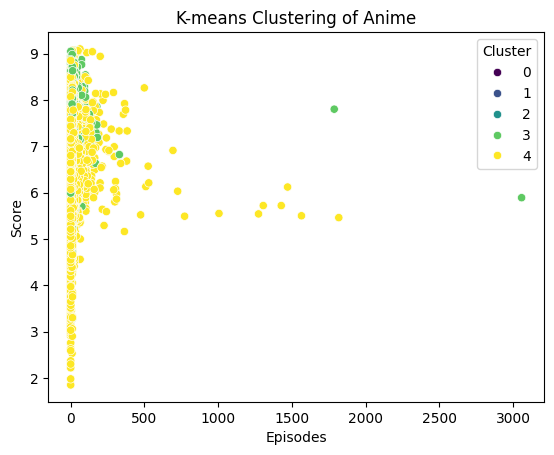

In [ ]:
sns.scatterplot(x='Episodes', y='Score', hue='Cluster', data=df_clustering, palette='viridis')
plt.title('K-means Clustering of Anime')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Membuat salinan dari DataFrame asli yang sudah di-drop
df_filtered = df.copy()
df_filtered['Episodes'] = df_filtered['Episodes'].replace('UNKNOWN', pd.NA)
df_filtered['Episodes'] = pd.to_numeric(df_filtered['Episodes'], errors='coerce')
df_filtered['Score'] = pd.to_numeric(df_filtered['Score'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Episodes', 'Score'])

# Menambahkan kolom Cluster ke df_filtered
df_filtered['Cluster'] = clusters

# Menampilkan hasil clustering
df_result = df_filtered[['Name', 'Genres', 'Episodes', 'Score', 'Cluster']]

# Menampilkan 50 baris pertama dari df_result
# Sebagai contoh hanya menampilkan 50 baris, bisa diganti sesuai keinginan
print(df_result.head(20))

# Menampilkan pesan jumlah baris dan kolom di bawahnya
print(f"\n[ {len(df_result)} rows x {len(df_result.columns)} columns ]")

                               Name  \
0                      Cowboy Bebop   
1   Cowboy Bebop: Tengoku no Tobira   
2                            Trigun   
3                Witch Hunter Robin   
4                    Bouken Ou Beet   
5                      Eyeshield 21   
6              Hachimitsu to Clover   
7        Hungry Heart: Wild Striker   
8            Initial D Fourth Stage   
9                           Monster   
10                           Naruto   
12              Tennis no Ouji-sama   
13                 Ring ni Kakero 1   
14                    School Rumble   
15                        Sunabouzu   
16                       Texhnolyze   
17                    Trinity Blood   
18                 Yakitate!! Japan   
19                           Zipang   
20          Neon Genesis Evangelion   

                                               Genres  Episodes  Score  \
0                       Action, Award Winning, Sci-Fi      26.0   8.75   
1                               

<ipython-input-17-a89532f85f28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = clusters


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

df_result.to_csv('/content/drive/My Drive/Colab Notebooks/hasil_clustering_anime.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
